In [1]:
!mkdir -p ./aiffel/autoint && wget -O ./aiffel/autoint/ml-1m.zip https://files.grouplens.org/datasets/movielens/ml-1m.zip

--2026-01-08 03:51:21--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘./aiffel/autoint/ml-1m.zip’

./aiffel/autoint/ml 100%[===================>]   5.64M  19.4MB/s    in 0.3s    

2026-01-08 03:51:22 (19.4 MB/s) - ‘./aiffel/autoint/ml-1m.zip’ saved [5917549/5917549]



In [2]:
!ls ./aiffel/autoint

ml-1m.zip


In [32]:
!pip install streamlit joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.0 MB/s eta 0:00:00


In [3]:
!unzip ./aiffel/autoint/ml-1m.zip -d ./aiffel/autoint

Archive:  ./aiffel/autoint/ml-1m.zip
   creating: ./aiffel/autoint/ml-1m/
  inflating: ./aiffel/autoint/ml-1m/movies.dat  
  inflating: ./aiffel/autoint/ml-1m/ratings.dat  
  inflating: ./aiffel/autoint/ml-1m/README  
  inflating: ./aiffel/autoint/ml-1m/users.dat  




*   ratings.dat : 누가 어떤영화에 몇점을 주었는가
*   movies.dat: 영화제목(장르)
*   users.dat: 유저 정보(성별, 직업 등)


In [ ]:
!pip install plotly

In [4]:
import pandas as pd
import os


path = './aiffel/autoint/ml-1m/'

# 1. Ratings 데이터 불러오기
ratings = pd.read_csv(
    os.path.join(path, 'ratings.dat'),
    sep='::',              # 구분자가 :: 입니다
    engine='python',       # 파이썬 엔진 사용
    names=['UserId', 'MovieId', 'Rating', 'Timestamp'], # 컬럼명 지정
    encoding='ISO-8859-1'
)

# 2. Movies 데이터 불러오기
movies = pd.read_csv(
    os.path.join(path, 'movies.dat'),
    sep='::',
    engine='python',
    names=['MovieId', 'Title', 'Genres'],
    encoding='ISO-8859-1'
)

# 3. Users 데이터 불러오기
users = pd.read_csv(
    os.path.join(path, 'users.dat'),
    sep='::',
    engine='python',
    names=['UserId', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='ISO-8859-1'
)

# 잘 불러와졌는지 확인
print("Ratings 데이터 크기:", ratings.shape)
print("Movies 데이터 크기:", movies.shape)
print("Users 데이터 크기:", users.shape)

display(ratings.head())

Ratings 데이터 크기: (1000209, 4)
Movies 데이터 크기: (3883, 3)
Users 데이터 크기: (6040, 5)


,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


**1.데이터 분석**

In [5]:
# 유니크한 영화 개수와 유저 수 다시 확인
n_users = ratings['UserId'].nunique()
n_movies = ratings['MovieId'].nunique()

print(f"유저 수: {n_users}")
print(f"영화 수: {n_movies}")

# 희소성(Sparsity) 계산
total_elements = n_users * n_movies
null_elements = total_elements - len(ratings)
sparsity = null_elements / total_elements

print(f"행렬의 희소성: {sparsity:.2%}")
# 결과가 약 95.7% 정도 나오면 정상입니다. (95% 이상이 비어있음)

유저 수: 6040
영화 수: 3706
행렬의 희소성: 95.53%


평점과 시간정보 분석
- 평점분석: 4점과 5점이 전체의 약 57%
- 전체 데이터의 90% 이상이 2000년에 생성 그중 11~12월 가장 높음
- 20대 후반 남성, 특정 직업군의 데이터가 많음
- 드라마나 코미디 장르가 주류, 아주 적은 수의 영화가 대부분 평점 독점(rong tail)

/tmp/ipython-input-1622111308.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=full_data, ax=axes[0,0], palette='viridis')
/tmp/ipython-input-1622111308.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=full_data, ax=axes[1,0], palette='magma')
/tmp/ipython-input-1622111308.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=full_data, ax=axes[2,0], palette='coolwarm')
/tmp/ipython-input-1622111308.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

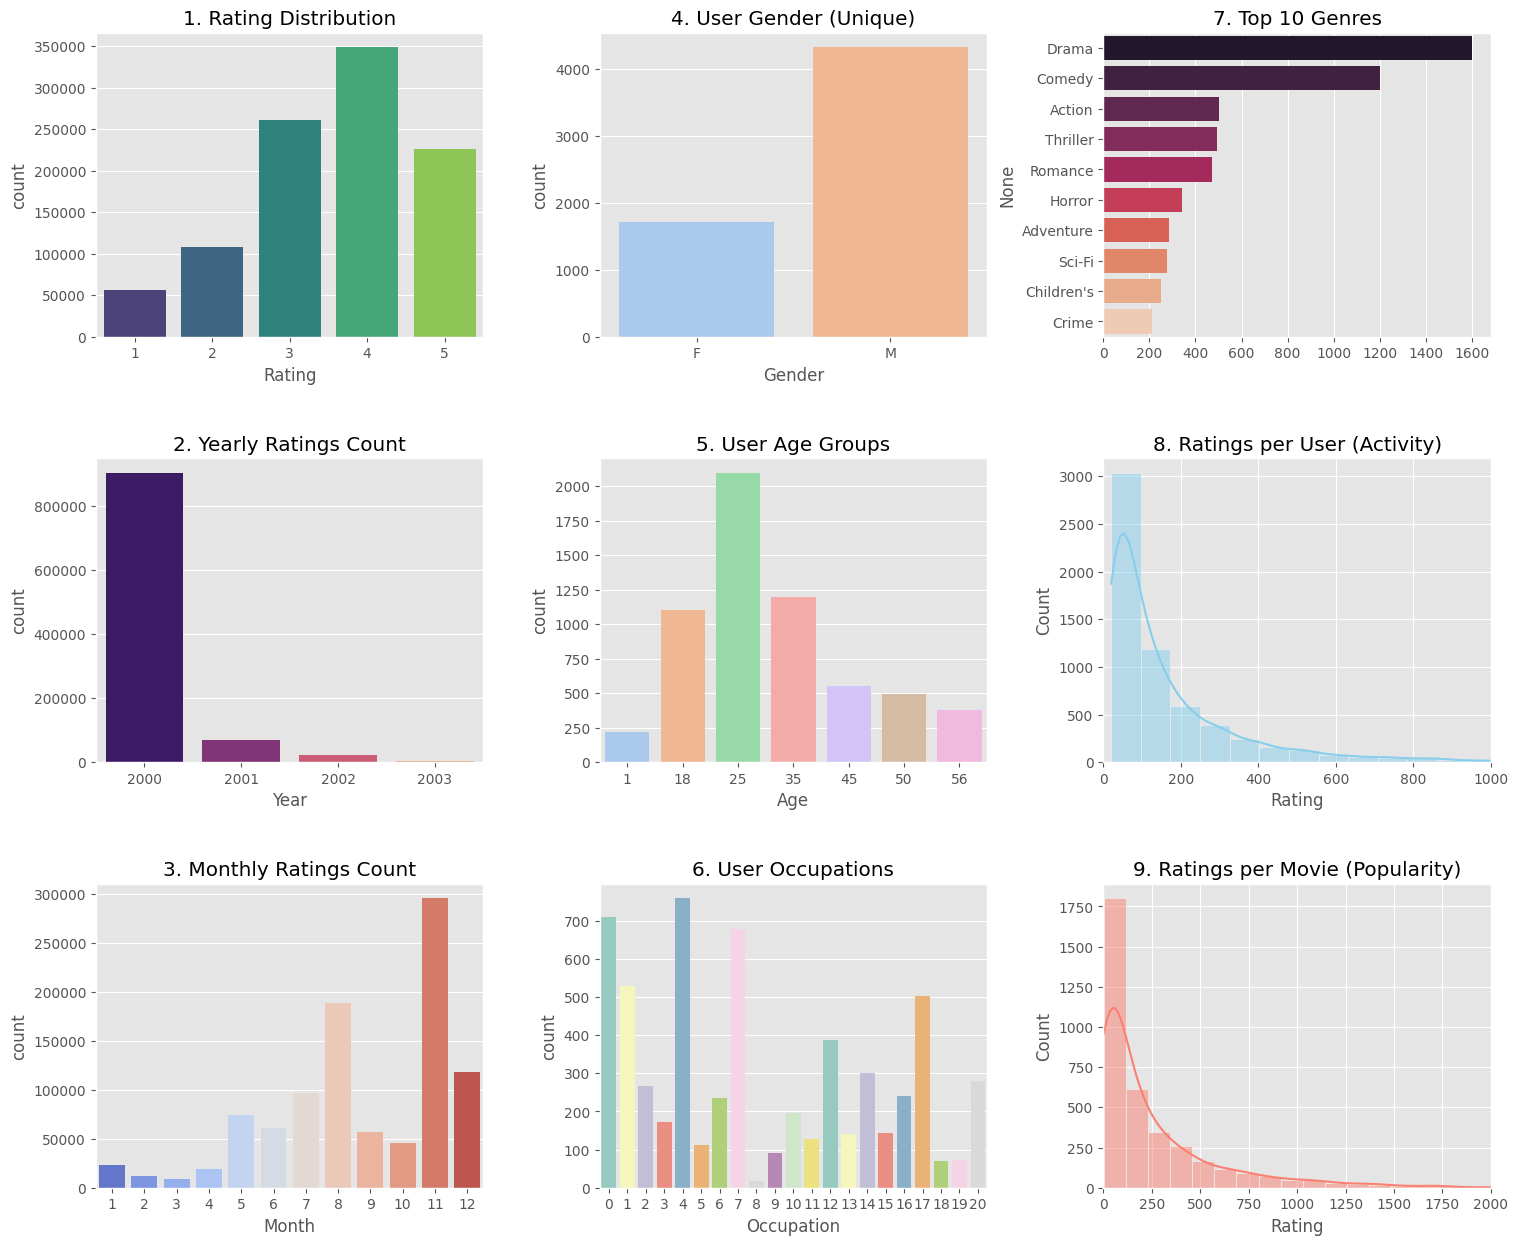

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 데이터 병합 (분석용)
full_data = pd.merge(ratings, users, on='UserId', how='left')
full_data = pd.merge(full_data, movies, on='MovieId', how='left')
full_data['Date'] = pd.to_datetime(full_data['Timestamp'], unit='s')
full_data['Year'] = full_data['Date'].dt.year

# 스타일 설정
plt.style.use('ggplot')
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- 1열: 점수 및 시간 분석 ---
# [0,0] 평점 분포
sns.countplot(x='Rating', data=full_data, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('1. Rating Distribution')

# [1,0] 연도별 평점 개수
sns.countplot(x='Year', data=full_data, ax=axes[1,0], palette='magma')
axes[1,0].set_title('2. Yearly Ratings Count')

# [2,0] 월별 데이터 트렌드 (시즌성 확인)
full_data['Month'] = full_data['Date'].dt.month
sns.countplot(x='Month', data=full_data, ax=axes[2,0], palette='coolwarm')
axes[2,0].set_title('3. Monthly Ratings Count')

# --- 2열: 사용자 특성 분석 ---
# [0,1] 성별 분포
sns.countplot(x='Gender', data=users, ax=axes[0,1], palette='pastel')
axes[0,1].set_title('4. User Gender (Unique)')

# [1,1] 나이대별 분포
sns.countplot(x='Age', data=users, ax=axes[1,1], palette='pastel')
axes[1,1].set_title('5. User Age Groups')

# [2,1] 직업군 분포 (0~20)
sns.countplot(x='Occupation', data=users, ax=axes[2,1], palette='Set3')
axes[2,1].set_title('6. User Occupations')

# --- 3열: 콘텐츠(영화) 분석 ---
# [0,2] 장르 Top 10
all_genres = movies['Genres'].str.split('|', expand=True).stack()
top_genres = all_genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[0,2], palette='rocket')
axes[0,2].set_title('7. Top 10 Genres')

# [1,2] 유저당 평점 개수 (활동량)
user_activity = full_data.groupby('UserId')['Rating'].count()
sns.histplot(user_activity, bins=30, ax=axes[1,2], kde=True, color='skyblue')
axes[1,2].set_title('8. Ratings per User (Activity)')
axes[1,2].set_xlim(0, 1000) # 너무 긴 꼬리 절단

# [2,2] 영화당 평점 개수 (인기 영화 편중도)
movie_popularity = full_data.groupby('MovieId')['Rating'].count()
sns.histplot(movie_popularity, bins=30, ax=axes[2,2], kde=True, color='salmon')
axes[2,2].set_title('9. Ratings per Movie (Popularity)')
axes[2,2].set_xlim(0, 2000)

plt.show()

**2. 데이터 전처리(Preprocessing)**

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. 사용할 피처 선정 (AutoInt+ 입력용)
# 사용자: ID, 성별, 나이, 직업 / 영화: ID, 장르(첫 번째 장르만 사용)
full_data['FirstGenre'] = full_data['Genres'].str.split('|').str[0]
sparse_features = ["UserId", "MovieId", "Gender", "Age", "Occupation", "FirstGenre"]

# 2. Label Encoding
label_encoders = {}
for feat in sparse_features:
    lbe = LabelEncoder()
    full_data[feat] = lbe.fit_transform(full_data[feat])
    features_max_idx[feat] = full_data[feat].max() + 1
    label_encoders[feat] = lbe # 인코더 객체 저장

# 3. 데이터셋 분리 (Train / Test)

train, test = train_test_split(full_data, test_size=0.2, random_state=42)

# 1) 데이터셋 저장
train.to_csv('movielens_rcmm_v2_train.csv', index=False)
test.to_csv('movielens_rcmm_v2_test.csv', index=False)
# 2) 인코더 객체 저장 (LMS 가이드: label_encoders.pkl)
joblib.dump(label_encoders, 'label_encoders.pkl')

# 3) 필드 차원 정보 저장 (LMS 가이드: field_dims.npy)
field_dims = [features_max_idx[f] for f in sparse_features]
import numpy as np
np.save('field_dims.npy', np.array(field_dims))

print("2단계 완료: 데이터 및 인코더/차원 파일 저장 성공!")


2단계 완료: 데이터 및 인코더/차원 파일 저장 성공!


**3단계 .ipynb에서 Autolnt 모델 학습 및 웨이트 저장**

- 3-1 모델 정의(TensorFlow 기반 Autolnt)

In [52]:
import tensorflow as tf
from tensorflow.keras import layers

class AutoInt(tf.keras.Model):
    def __init__(self, field_dims, embed_dim=16, head_num=2, attn_layers=3):
        super(AutoInt, self).__init__()
        # Embedding: 각 피처를 정해진 차원의 벡터로 변환
        self.embeddings = [layers.Embedding(dim, embed_dim) for dim in field_dims]

        # Self-Attention Blocks
        self.attn_blocks = [
            layers.MultiHeadAttention(num_heads=head_num, key_dim=embed_dim)
            for _ in range(attn_layers)
        ]

        # Output: 최종 평점 예측
        self.final_linear = layers.Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, num_fields)
        embeds = [self.embeddings[i](inputs[:, i]) for i in range(inputs.shape[1])]
        embeds = tf.stack(embeds, axis=1) # (batch_size, num_fields, embed_dim)

        attn_out = embeds
        for block in self.attn_blocks:
            attn_out = block(attn_out, attn_out)

        attn_out = layers.Flatten()(attn_out)
        return tf.squeeze(self.final_linear(attn_out), axis=1)

# 모델 생성 (2단계의 field_dims 변수 사용)
model_autoint = AutoInt(field_dims)

- 3-2 모델 컴파일 및 학습

In [53]:
# 학습 데이터 준비 (sparse_features 열 사용)
X_train = train[sparse_features].values
y_train = train['Rating'].values
X_test = test[sparse_features].values
y_test = test['Rating'].values

# 모델 컴파일
model_autoint.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

# 학습 시작
model_autoint.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 128s 39ms/step - loss: 1.4162 - mae: 0.8917 - val_loss: 0.8445 - val_mae: 0.7274
Epoch 2/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 124s 33ms/step - loss: 0.8328 - mae: 0.7225 - val_loss: 0.8378 - val_mae: 0.7247
Epoch 3/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - loss: 0.8258 - mae: 0.7187 - val_loss: 0.8346 - val_mae: 0.7278
Epoch 4/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 92s 30ms/step - loss: 0.8153 - mae: 0.7131 - val_loss: 0.8179 - val_mae: 0.7124
Epoch 5/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 96s 31ms/step - loss: 0.7982 - mae: 0.7045 - val_loss: 0.8131 - val_mae: 0.7073
Epoch 6/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 92s 29ms/step - loss: 0.7860 - mae: 0.6987 - val_loss: 0.8091 - val_mae: 0.7159
Epoch 7/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 97s 31ms/step - loss: 0.7762 - mae: 0.6940 - val_loss: 0.8004 - val_mae: 0.7037
Epoch 8/10
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 93s 30ms/step - loss: 0.7677 - mae: 0.6905 - val_loss: 0.7889 - val_mae: 0.7002
Epoch 9/10
3126/3126 ━

- 3-3 가중치 저장

In [54]:
# 가중치 파일 저장
model_autoint.save_weights('autoInt_model_weights.weights.h5')

print("✅ 3단계 완료: autoInt_model_weights.weights.h5 저장 성공!")

✅ 3단계 완료: autoInt_model_weights.weights.h5 저장 성공!


**4단계: Autolnt모델 패킹 및 Streamlit만들기
**

- 4-1 모던클래스 분리(autoint.py생성)

In [55]:
%%writefile autoint.py
import tensorflow as tf
from tensorflow.keras import layers

class AutoInt(tf.keras.Model):
    def __init__(self, field_dims, embed_dim=16, head_num=2, attn_layers=3):
        super(AutoInt, self).__init__()
        # Embedding Layer
        self.embeddings = [layers.Embedding(dim, embed_dim) for dim in field_dims]

        # Self-Attention Blocks
        self.attn_blocks = [
            layers.MultiHeadAttention(num_heads=head_num, key_dim=embed_dim)
            for _ in range(attn_layers)
        ]

        # Output Layer
        self.final_linear = layers.Dense(1)

    def call(self, inputs):
        # inputs: [batch_size, num_fields]
        embeds = [self.embeddings[i](inputs[:, i]) for i in range(inputs.shape[1])]
        embeds = tf.stack(embeds, axis=1)

        attn_out = embeds
        for block in self.attn_blocks:
            attn_out = block(attn_out, attn_out)

        attn_out = layers.Flatten()(attn_out)
        return tf.squeeze(self.final_linear(attn_out), axis=1)

Writing autoint.py


- 4-2 시각화 서비스 코드 생성(app.py)

In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from autoint import AutoInt

@st.cache_resource
def load_assets():
    # 1. 데이터 로드 (사용자님이 확인해주신 경로 반영)
    base_path = 'aiffel/autoint/ml-1m/'
    movies = pd.read_csv(base_path + 'movies.dat', sep='::', engine='python',
                         names=['MovieId', 'Title', 'Genres'], encoding='latin-1')

    # 2. 전처리 객체 및 차원 정보 로드
    encoders = joblib.load('label_encoders.pkl')
    field_dims = np.load('field_dims.npy')

    # 3. 모델 초기화 및 3단계에서 저장한 가중치 로드
    model = AutoInt(field_dims)
    # 가상의 데이터를 넣어 모델 빌드 (가중치 로드 전 필수 단계)
    model(np.zeros((1, len(field_dims)), dtype=np.int32))
    model.load_weights('autoInt_model_weights.weights.h5')

    return movies, encoders, model

st.title("🎬 MovieLens 추천 시스템 (Basic)")

try:
    movies, encoders, model = load_assets()
    user_id = st.sidebar.number_input("User ID (1-6040)", 1, 6040, 1)

    if st.sidebar.button("추천 받기"):
        # 전체 영화에 대한 평점 예측 (간이 로직)
        all_movie_ids = movies['MovieId'].values
        user_idx = encoders['UserId'].transform([user_id])[0]

        # 모델 입력 데이터 생성 (전체 영화에 대해 해당 유저와의 조합 생성)
        test_inputs = []
        for m_id in all_movie_ids:
            try:
                m_idx = encoders['MovieId'].transform([m_id])[0]
                # [UserId, MovieId, Gender, Age, Occupation, FirstGenre] 순서 (나머지는 0으로 채움)
                test_inputs.append([user_idx, m_idx, 0, 0, 0, 0])
            except:
                continue # 인코더에 없는 영화는 건너뜀

        preds = model.predict(np.array(test_inputs))
        top_indices = np.argsort(preds)[-10:][::-1]

        st.write(f"### 👤 {user_id}번 유저를 위한 추천 목록")
        rec_list = movies.iloc[top_indices][['Title']].copy()
        rec_list['Score'] = np.sort(preds)[-10:][::-1]
        st.table(rec_list)

except Exception as e:
    st.error(f"⚠️ 에러 발생: {e}")

Overwriting app.py


**5단계: PyTorch 모델(Autolnt+)를 TensorFlow변환** 실

- 5-1 Autolnt + 모델정의(.ipynb에서 실행)


In [57]:
import tensorflow as tf
from tensorflow.keras import layers

class AutoIntPlusTF(tf.keras.Model):
    def __init__(self, field_dims, embed_dim=16, head_num=2, attn_layers=3, mlp_dims=(64, 32), dropout=0.2):
        super(AutoIntPlusTF, self).__init__()

        # 1. Embedding Layers: 각 피처를 벡터화
        self.embeddings = [layers.Embedding(dim, embed_dim) for dim in field_dims]

        # 2. Self-Attention Layers (Path 1)
        self.attn_blocks = [
            layers.MultiHeadAttention(num_heads=head_num, key_dim=embed_dim, dropout=dropout)
            for _ in range(attn_layers)
        ]

        # 3. MLP Layers (Path 2: AutoInt+의 추가 특징)
        self.mlp = tf.keras.Sequential()
        for dim in mlp_dims:
            self.mlp.add(layers.Dense(dim, activation='relu'))
            self.mlp.add(layers.Dropout(dropout))

        # 4. Final Prediction: Attention 결과와 MLP 결과를 결합하여 예측
        self.final_linear = layers.Dense(1)

    def call(self, inputs, training=False):
        # 입력 데이터 임베딩 변환
        embeds = [self.embeddings[i](inputs[:, i]) for i in range(inputs.shape[1])]
        embeds = tf.stack(embeds, axis=1) # [batch, fields, embed_dim]

        # [Path 1] Multi-head Self-Attention
        attn_out = embeds
        for block in self.attn_blocks:
            attn_out = block(attn_out, attn_out, training=training)
        attn_out = layers.Flatten()(attn_out)

        # [Path 2] Deep Neural Network (MLP)
        mlp_in = layers.Flatten()(embeds)
        mlp_out = self.mlp(mlp_in, training=training)

        # 두 경로의 출력 결합
        combined = tf.concat([attn_out, mlp_out], axis=1)
        output = self.final_linear(combined)

        return tf.squeeze(output, axis=1)

# 모델 인스턴스 생성 (6단계에서 사용할 준비)
# field_dims는 2단계 전처리에서 저장된 값을 그대로 사용합니다.
model_plus = AutoIntPlusTF(field_dims)
print("✅ 5단계 완료: AutoInt+ 모델이 TensorFlow 버전으로 변환되었습니다.")

✅ 5단계 완료: AutoInt+ 모델이 TensorFlow 버전으로 변환되었습니다.


**6단계: .ipynb에서 Autolnt모델 학습 및 웨이트 저장**

In [58]:
# 1. 모델 컴파일
model_plus.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# 2. 모델 학습 (에포크, 배치 사이즈 등은 성능 향상을 위해 조절 가능)
history_plus = model_plus.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128, # AutoInt+는 더 정밀한 학습을 위해 배치 사이즈 조정 가능
    validation_data=(X_test, y_test),
    verbose=1
)

# 3. AutoInt+ 전용 가중치 저장
model_plus.save_weights('autoInt_plus_tf.weights.h5')
print("✅ 6단계 완료: autoInt_plus_tf.weights.h5 저장 성공!")

Epoch 1/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 158s 23ms/step - loss: 1.2138 - mae: 0.8409 - val_loss: 0.8201 - val_mae: 0.7174
Epoch 2/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 137s 22ms/step - loss: 0.8080 - mae: 0.7083 - val_loss: 0.7946 - val_mae: 0.7037
Epoch 3/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 187s 30ms/step - loss: 0.7718 - mae: 0.6910 - val_loss: 0.7787 - val_mae: 0.6911
Epoch 4/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 175s 26ms/step - loss: 0.7466 - mae: 0.6791 - val_loss: 0.7757 - val_mae: 0.6974
Epoch 5/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 183s 23ms/step - loss: 0.7275 - mae: 0.6696 - val_loss: 0.7595 - val_mae: 0.6847
Epoch 6/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 134s 21ms/step - loss: 0.7135 - mae: 0.6626 - val_loss: 0.7649 - val_mae: 0.6891
Epoch 7/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 139s 22ms/step - loss: 0.6999 - mae: 0.6563 - val_loss: 0.7633 - val_mae: 0.6871
Epoch 8/10
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 134s 21ms/step - loss: 0.6901 - mae: 0.6513 - val_loss: 0.7559 - val_mae: 0.6835
Epoch 9/10
6252/

**7단계: .py파일 패킹( Autolnt +버전) 및 최종 Streamlit제작**

- 7-1 고도화 모델 클래스 패킹(autoint_plus.py생성)

In [59]:
%%writefile autoint_plus.py
import tensorflow as tf
from tensorflow.keras import layers

class AutoIntPlusTF(tf.keras.Model):
    def __init__(self, field_dims, embed_dim=16, head_num=2, attn_layers=3, mlp_dims=(64, 32), dropout=0.2):
        super(AutoIntPlusTF, self).__init__()
        self.embeddings = [layers.Embedding(dim, embed_dim) for dim in field_dims]
        self.attn_blocks = [
            layers.MultiHeadAttention(num_heads=head_num, key_dim=embed_dim, dropout=dropout)
            for _ in range(attn_layers)
        ]
        self.mlp = tf.keras.Sequential()
        for dim in mlp_dims:
            self.mlp.add(layers.Dense(dim, activation='relu'))
            self.mlp.add(layers.Dropout(dropout))
        self.final_linear = layers.Dense(1)

    def call(self, inputs, training=False):
        embeds = [self.embeddings[i](inputs[:, i]) for i in range(inputs.shape[1])]
        embeds = tf.stack(embeds, axis=1)

        # Path 1: Attention
        attn_out = embeds
        for block in self.attn_blocks:
            attn_out = block(attn_out, attn_out, training=training)
        attn_out = layers.Flatten()(attn_out)

        # Path 2: MLP
        mlp_out = self.mlp(layers.Flatten()(embeds), training=training)

        combined = tf.concat([attn_out, mlp_out], axis=1)
        return tf.squeeze(self.final_linear(combined), axis=1)

Writing autoint_plus.py


- 7-2 최종 Streamlit 앱 제작 (app_final.py)

In [60]:
%%writefile app_final.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from autoint_plus import AutoIntPlusTF

@st.cache_resource
def load_assets():
    base_path = 'aiffel/autoint/ml-1m/'
    movies = pd.read_csv(base_path + 'movies.dat', sep='::', engine='python',
                         names=['MovieId', 'Title', 'Genres'], encoding='latin-1')
    encoders = joblib.load('label_encoders.pkl')
    field_dims = np.load('field_dims.npy')

    # AutoInt+ 모델 로드
    model = AutoIntPlusTF(field_dims)
    model(np.zeros((1, len(field_dims)), dtype=np.int32))
    model.load_weights('autoInt_plus_tf.weights.h5')

    return movies, encoders, model

st.set_page_config(page_title="MovieLens 추천 시스템", layout="wide")
st.title("🎬 MovieLens 고도화 추천 시스템 (AutoInt+)")

movies, encoders, model = load_assets()

with st.sidebar:
    user_id = st.number_input("User ID (1-6040)", 1, 6040, 2)
    btn = st.button("고도화된 추천 받기")

if btn:
    user_idx = encoders['UserId'].transform([user_id])[0]
    all_movie_ids = movies['MovieId'].values

    # 예측용 데이터 생성
    test_inputs = []
    valid_movies = []
    for m_id in all_movie_ids:
        try:
            m_idx = encoders['MovieId'].transform([m_id])[0]
            test_inputs.append([user_idx, m_idx, 0, 0, 0, 0])
            valid_movies.append(m_id)
        except: continue

    preds = model.predict(np.array(test_inputs), batch_size=512)
    top_10_idx = np.argsort(preds)[-10:][::-1]

    st.subheader(f"👤 {user_id}번 유저를 위한 추천 목록")
    res = movies[movies['MovieId'].isin([valid_movies[i] for i in top_10_idx])].copy()
    res['Score'] = [preds[i] for i in top_10_idx]
    st.table(res[['Title', 'Score']])

Writing app_final.py


**Streamlit 화면접속하기**

- 1. 터널링 프로그램 설치


In [61]:
!curl -L https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb -o cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.2M  100 19.2M    0     0  14.4M      0  0:00:01  0:00:01 --:--:-- 47.4M
(Reading database ... 117532 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) over (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...


- 2. Streamlit 서버 및 터널링 실행

In [ ]:
import subprocess
import threading
import time
import socket

# 1. Streamlit을 백그라운드에서 실행 (최종 버전 app_final.py)
p = subprocess.Popen(["streamlit", "run", "app_final.py"])

# 2. Cloudflare Tunnel을 통해 외부 접속 주소 생성
time.sleep(3) # 서버 기동 대기
!cloudflared tunnel --url http://localhost:8501

2026-01-08T07:12:11Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-01-08T07:12:11Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-01-08T07:12:15Z INF +--------------------------------------------------------------------------------------------+
2026-01-08T07:12:15Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-01-08T07:12:15Z INF |  https://samples-ready-debut-mainland.trycloudflare.co